# **Assignment 3:** Group 25

Yuval Rossen (S5322197)

Nick Huisman (S5378117)

Mark Prirodins (S4763939)

Cata Mihit (S4737849)

# **1. Lifetime of particles**


### Note: For the 'Lifetime of particles' problem set, we've considered every bullet point as a separate question, which we'll refer to as 'tasks'.

### Task 1: Generate two samples of random data from exponential distributions

In [ ]:
import numpy as np

# Parameters for the exponential distributions
lambda_1 = 10
lambda_2 = 50
sample_size = 1000

# Generate two samples
sample_1 = np.random.exponential(scale=1/lambda_1, size=sample_size)
sample_2 = np.random.exponential(scale=1/lambda_2, size=sample_size)


### Task 2: Mix both data samples

In [ ]:
# Combine the two samples
mixed_sample = np.concatenate([sample_1, sample_2])

### Task 3: Determine parameters λ using Method of Moments estimator

In [ ]:
# Method of Moments estimator to estimate the lambdas
estimated_lambda_1 = 1 / np.mean(sample_1)
estimated_lambda_2 = 1 / np.mean(sample_2)

print(f"λ_1 (Method of Moments estimation): {estimated_lambda_1}")
print(f"λ_2 (Method of Moments estimation): {estimated_lambda_2}")

λ_1 (Method of Moments estimation): 10.014938752793713
λ_2 (Method of Moments estimation): 53.28921882587804


### Task 4: Create histograms with different bins and make three different fits;
#### (that is: fit without uncertainties, fit with uncertainties and a fit with a fitting function (that integrates PDF).)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


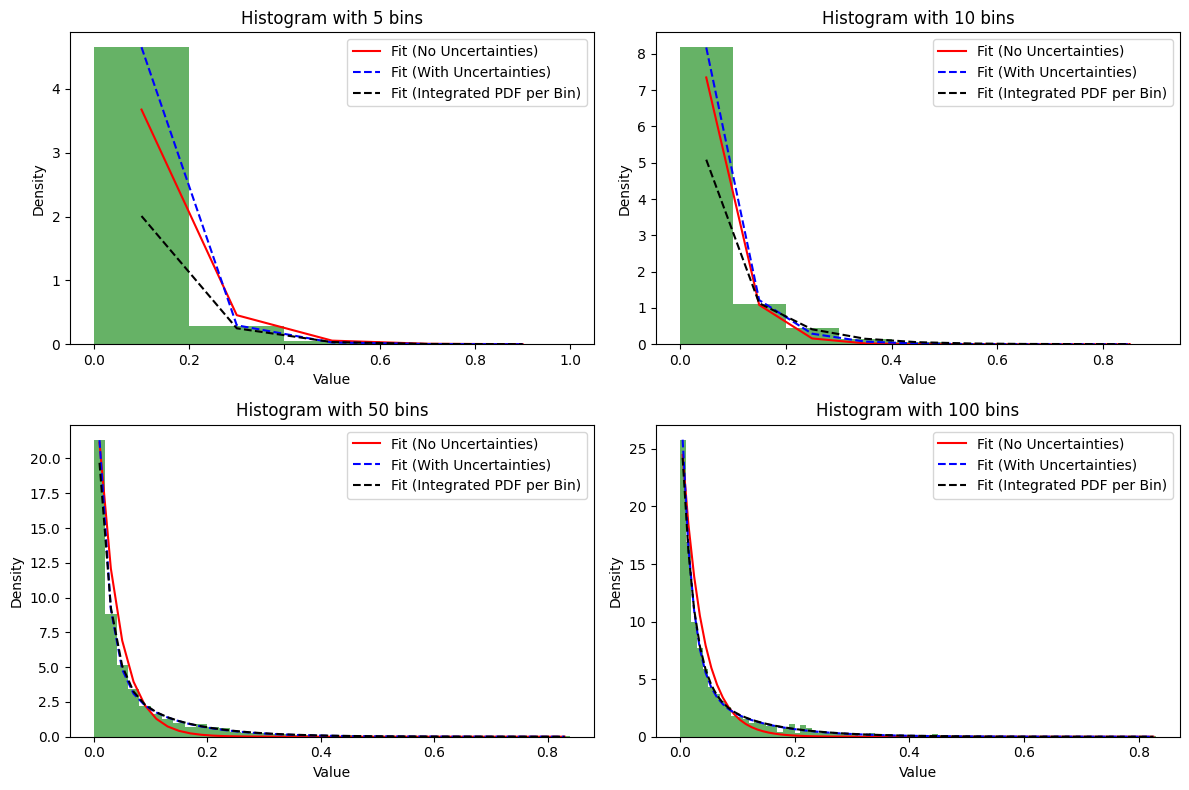

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# List of bin counts for histograms
num_bins = [5, 10, 50, 100]

# Create subplots to display the histograms
plt.figure(figsize=(12, 8))

# Define a custom function for the mixed exponential model
def mixed_exponential(x, lmbda_1, lmbda_2, A):
    return A * (lmbda_1 * np.exp(-lmbda_1 * x) + lmbda_2 * np.exp(-lmbda_2 * x))

# Custom integrated PDF function for each bin
def integrated_exponential_per_bin(x, lmbda):
    bin_width = bin_edges[1] - bin_edges[0]
    return (1/2) * (lambda_1 * np.exp(-lambda_1 * x) + lambda_2 * np.exp(-lambda_2 * x))

for i, bins in enumerate(num_bins):
    plt.subplot(2, 2, i + 1)
    hist, bin_edges = np.histogram(mixed_sample, bins=bins, range=[0, 1], density=True)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # Filter out zero values in hist
    non_zero_mask = hist > 0
    hist_non_zero = hist[non_zero_mask]
    bin_centers_non_zero = bin_centers[non_zero_mask]

    plt.bar(bin_centers_non_zero, hist_non_zero, width=1/bins, alpha=0.6, color='g')
    plt.title(f'Histogram with {bins} bins')
    plt.xlabel('Value')
    plt.ylabel('Density')

    # Fit data to the exponential distribution and plot the fitted curve
    def exponential_func(x, lmbda):
        return lmbda * np.exp(-lmbda * x)

    # Fit without taking into account statistical uncertainties
    params, _ = curve_fit(exponential_func, bin_centers_non_zero, hist_non_zero, p0=[1])
    plt.plot(bin_centers_non_zero, exponential_func(bin_centers_non_zero, params[0]), 'r-', label='Fit (No Uncertainties)')

    # Fit taking into account statistical uncertainties with custom model
    params_with_uncertainties, _ = curve_fit(mixed_exponential, bin_centers_non_zero, hist_non_zero, p0=[estimated_lambda_1, estimated_lambda_2, 1])
    plt.plot(bin_centers_non_zero, mixed_exponential(bin_centers_non_zero, *params_with_uncertainties), 'b--', label='Fit (With Uncertainties)')

    # Fit with custom integrated PDF function for each bin
    params_per_bin, _ = curve_fit(integrated_exponential_per_bin, bin_centers_non_zero, hist_non_zero, p0=[1])
    plt.plot(bin_centers_non_zero, integrated_exponential_per_bin(bin_centers_non_zero, params_per_bin[0]), 'k--', label='Fit (Integrated PDF per Bin)')

    plt.legend()

plt.tight_layout()
plt.show()

### Task 5: Determine both parameters λ from histograms using Least Square Estimator method

In [ ]:
# Task 5: Print the lambda values for graphical fits from Task 4

# List of bin counts for histograms
num_bins = [5, 10, 50, 100]

for bins in num_bins:
    hist, bin_edges = np.histogram(mixed_sample, bins=bins, range=[0, 1], density=True)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # Filter out zero values in hist
    non_zero_mask = hist > 0
    hist_non_zero = hist[non_zero_mask]
    bin_centers_non_zero = bin_centers[non_zero_mask]

    # Fit data to the mixed exponential model
    params, _ = curve_fit(mixed_exponential, bin_centers_non_zero, hist_non_zero, p0=[estimated_lambda_1, estimated_lambda_2, 1])
    lambda_1_fit, lambda_2_fit, _ = params
    print(f"λ_1 (Fitted) for {bins} bins: {lambda_1_fit:.2f}")
    print(f"λ_2 (Fitted) for {bins} bins: {lambda_2_fit:.2f}")


λ_1 (Fitted) for 5 bins: 11.67
λ_2 (Fitted) for 5 bins: 24.09
λ_1 (Fitted) for 10 bins: 13.84
λ_2 (Fitted) for 10 bins: 40.04
λ_1 (Fitted) for 50 bins: 10.50
λ_2 (Fitted) for 50 bins: 57.39
λ_1 (Fitted) for 100 bins: 10.31
λ_2 (Fitted) for 100 bins: 55.00


### Task 6: Apply method of Maximum likelihood to extract both parameters λ from histograms

<ipython-input-7-eb8e35cead52>:4: RuntimeWarning: divide by zero encountered in log
  log_likelihood_value = np.sum(np.log(lambda_1 * np.exp(-lambda_1 * data) + lambda_2 * np.exp(-lambda_2 * data)))


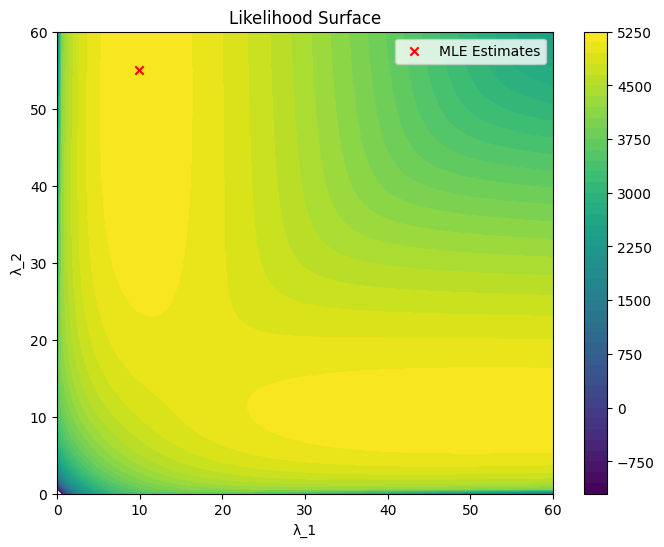

λ_1 (Method of Maximum Likelihood estimation): 9.939973483108153
λ_2 (Method of Maximum Likelihood estimation): 55.03956602228307


In [ ]:
# Calculate log likelihood function
def log_likelihood(params, data):
    lambda_1, lambda_2 = params
    log_likelihood_value = np.sum(np.log(lambda_1 * np.exp(-lambda_1 * data) + lambda_2 * np.exp(-lambda_2 * data)))
    return -log_likelihood_value

# Initial guess for parameters
initial_params = [10, 50]

# Optimize using scipy minimize function
from scipy.optimize import minimize

result = minimize(log_likelihood, initial_params, args=(mixed_sample,), bounds=[(0, None), (0, None)])

# Extract MLE estimates
mle_lambda_1, mle_lambda_2 = result.x

# Plot likelihood function close to maxima
lambda_1_values = np.linspace(0, 60, 100)
lambda_2_values = np.linspace(0, 60, 100)

likelihood_surface = np.zeros((100, 100))

# Now calculate negative log-likelihood values for various combinations of λ_1 and λ_2
# Then using the mixed sample data and store results in the 'likelihood_surface' array.
for i, lambda_1 in enumerate(lambda_1_values):
    for j, lambda_2 in enumerate(lambda_2_values):
        likelihood_surface[i, j] = -log_likelihood([lambda_1, lambda_2], mixed_sample)

plt.figure(figsize=(8, 6))
plt.contourf(lambda_1_values, lambda_2_values, likelihood_surface, levels=50, cmap='viridis', extent=[0, 60, 0, 60])
plt.colorbar()
plt.xlabel('λ_1')
plt.ylabel('λ_2')
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.title('Likelihood Surface')
plt.scatter(mle_lambda_1, mle_lambda_2, color='red', marker='x', label='MLE Estimates')
plt.legend()
plt.show()

# Print MLE estimates
print(f"λ_1 (Method of Maximum Likelihood estimation): {mle_lambda_1}")
print(f"λ_2 (Method of Maximum Likelihood estimation): {mle_lambda_2}")


**Discussion task 1, 2 and 3:** As one can see, the result for the first three tasks are quite obvious; first we make the paramters $ \lambda_1$ & $ \lambda_2$. Then Generate samples which are mixed in task 2. In task 3, by applying the Method of Moments estimator, we can succesfully extract the $ \lambda_1$ & $ \lambda_2$ value out of the mixed data sample.

**Discussion task 4:** In this task we're asked to perform 3 different fits: one without uncertainties, one with uncertainties and one where we perform a fit using a fitting function which integrates PDF over each bin. As a result, one can see that the three fits are quite similar for all the four plots. Some interesting observations are: <br>
* The deviation of the fits gradually decreases as the amount of bins increases.
* The higher the number of bins in the generated histogram, the smoother the function is.

**Discussion task 5:** In this code block, we are estimating the λ parameters for the mixed exponential model by fitting the model to histograms of different bin counts. These estimates are calculated for varying bin counts and print the resulting λ values. This shows how the bin count affects our parameter estimates. The goal is to see how well our model fits the data with different levels of bin "widths".

**Discussion task 6:** This 2d colormap plot shows us the likelihood of the random exponential dataset to be in certain regions (where yollow high value == high probability and colours corresponding to lower values corresponding to lower probabilities).
<br>
Furthermore, in the plot, a red cross is placed at the intersection of two imaginary lines that extend down to both the x and y axis. The y axis then gives us the estimated $ \lambda_2$ value and the x axis shows us the estimated $ \lambda_1$ value (calculated using 'Method of Maximum Likelihood estimation'). These values for $ \lambda_1$ & $ \lambda_2$ are also printed seperately.
<br>
<br>
### Discussion of outcomes, method comparisons & influence of starting parameters:

In the provided code, we estimated λ parameters for a mixed exponential model using Method of Moments (MoM), Least Squares Estimation (LSE), and Maximum Likelihood Estimation (MLE).

- MoM computes λ from sample means. Its estimates are reasonably close to the actual values.
- LSE involves fitting the data to the mixed exponential model. The λ values obtained from this method are close to the true values of lambda, but the starting parameters can influence the outcome.
- MLE also involves fitting the model to the data, but it maximizes the likelihood function. MLE provides estimates that are quite close to the actual values.
- If the starting parameters are far from the actual values, the optimization algorithm may converge to local optima, so it is important to have an accurate "initial guess".


In [ ]:
# Import necessary packages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize
from scipy import integrate


# **Fitting & Interpretation**

## Distributions

The pdf of a sum of random variables is the convolution of the pdfs of each random variable. Thus, the sum of two Gaussian random variables is also a Gaussian random variable. The sum of a Gaussian and a Lorentzian (Cauchy-distributed) random variables is a Voigtian.

Both the Gaussian Distribution and the Cauchy-Lorentz Distribution are parametrized by location and scale parameters, corresponding to the peak and width of the probability distribution functions. Thus, for a given dataset, fitting a sum of Gaussians or the sum of a Gaussian with a Lorentzian reduces to estimating the unknown peaks and widths.

The beam energy is described by a Gaussian with a width of about 50 keV. The peaks of the distributions are equal and at zero, since the energy scale is centered by subtracting $E_0$. This leaves the width of the second distribution to be estimated, which will describe the 'width' of X(3772).

## Approach and Code
The functions to be fit to the data are defined for both the two-Gaussian and the Voigtian cases, following the above descriptions of the distribution in each case. For a smooth background we assume the functions are offset by a constant, which represents an additional parameter we need to fit.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Results using Gaussian:
    Amplitude: 225.9210643497021
    Width of X(3772): 0.1235718448279877
    Background: 0


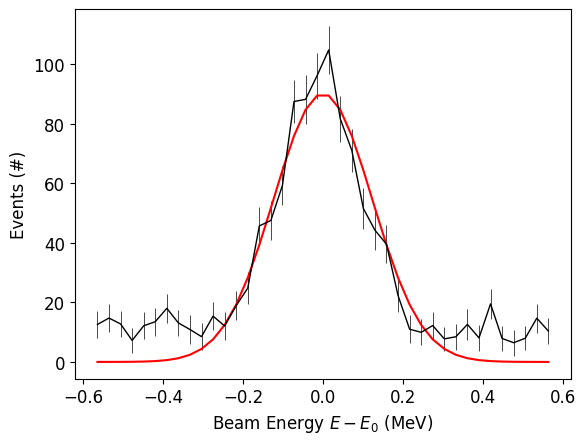

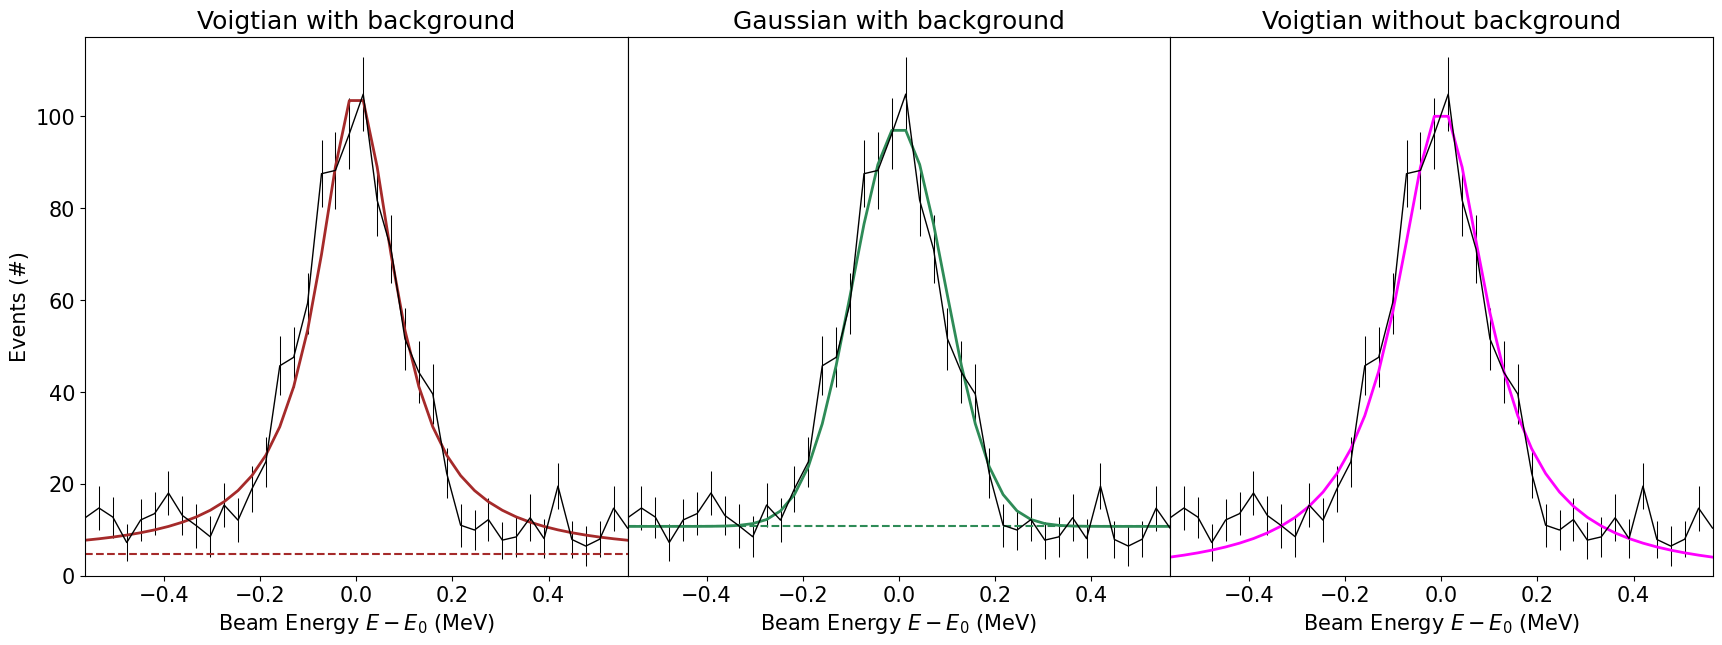

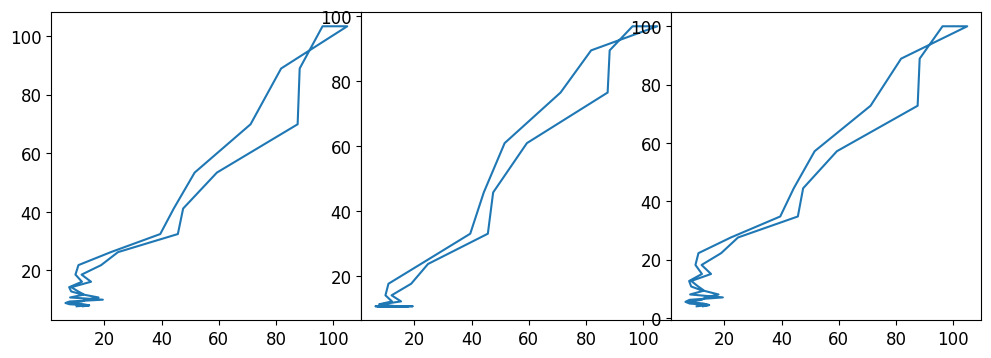

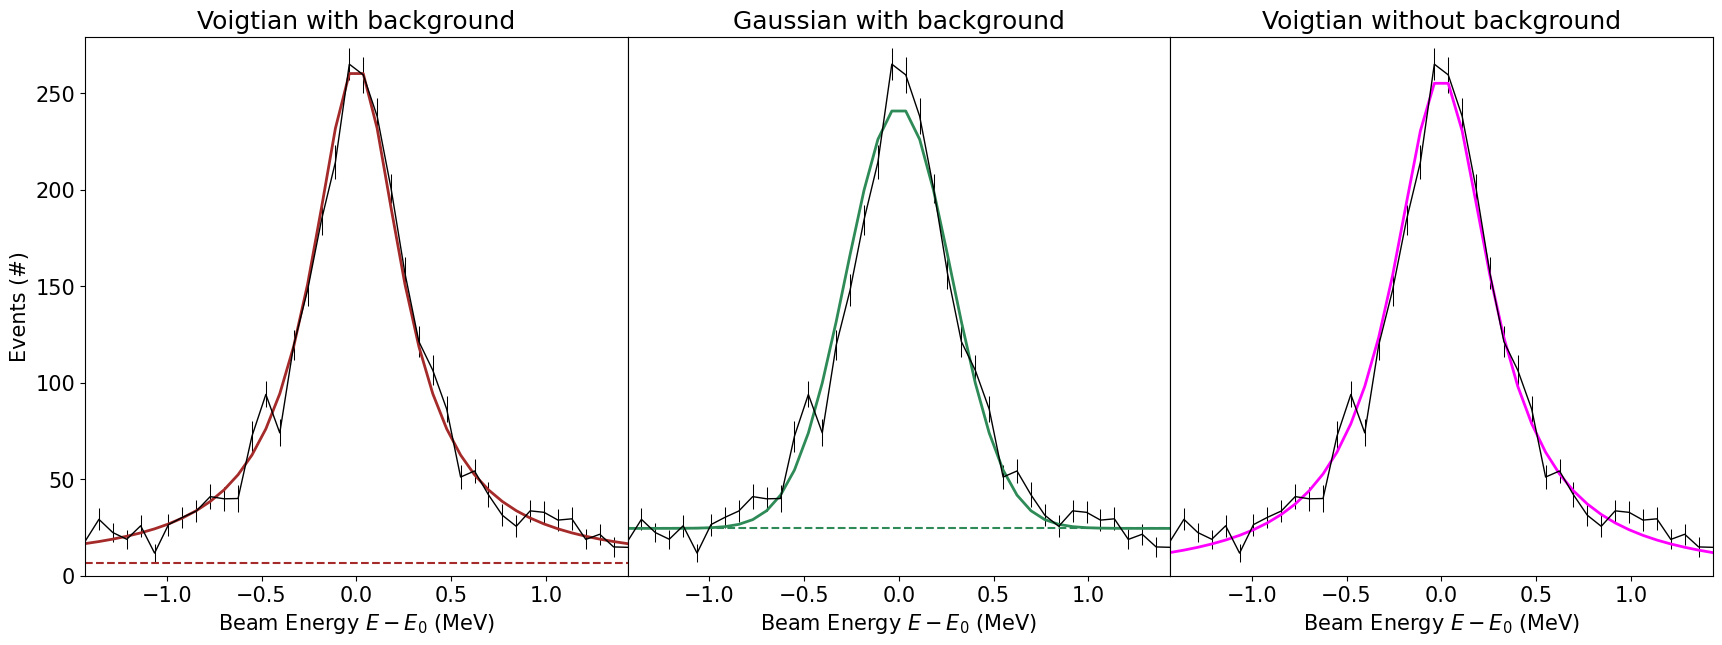

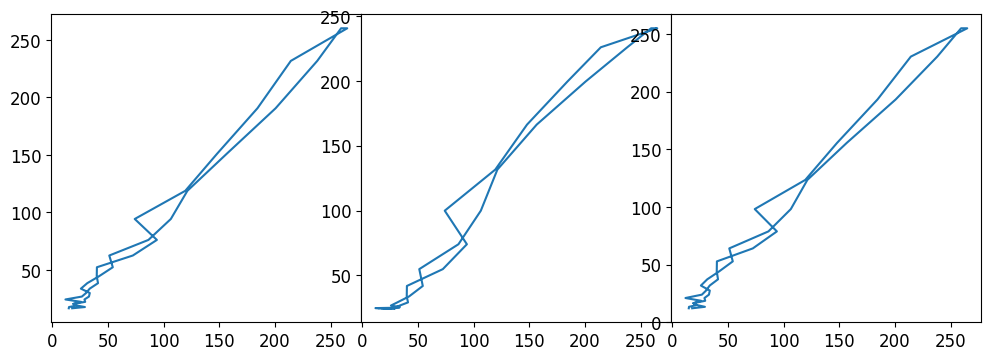

In [ ]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/gdrive')

# Define fitting functions
def fitting_function_explicit(x, amplitude, scale2, yoffset, case='voigtian'):
    """
    Returns the modified probability density function (pdf) for the
    exponential distribution adapted to fit the data (scaled)

    Input parameters:
        x -- argument for which the PDF will be evaluated
        Fitting parameters:
          | amplitude -- multiplication factor for scaling the final PDF
          | scale2 -- width parameter of the second distribution's PDF
          | yoffset -- smooth background formulated as a constant y-offset
        case -- either 'gaussian' or 'voigtian' depending on method
        background -- whether the smooth background is also used
    """
    dist1 = stats.norm()                                          # defines Gaussian (beam energy)
    scale1 = 5e-05                                                # 50 keV --> 5 * 10^-5 MeV

    dist2 = stats.cauchy() if case=='voigtian' else stats.norm()  # chooses Gaussian or Lorentzian

    return amplitude * (dist1.pdf(x / scale1) + dist2.pdf(x / scale2)) + yoffset

def voigtian_bg(x, amplitude, scale2, yoffset):
    return fitting_function_explicit(x, amplitude, scale2, yoffset, 'voigtian')

def gaussian_bg(x, amplitude, scale2, yoffset):
    return fitting_function_explicit(x, amplitude, scale2, yoffset, 'gaussian')

def voigtian_nobg(x, amplitude, scale2):
    return fitting_function_explicit(x, amplitude, scale2, 0, 'voigtian')

# not needed but used for checking
def gaussian_nobg(x, amplitude, scale2):
    return fitting_function_explicit(x, amplitude, scale2, 0, 'gaussian')

# DATA MANIP
def read_dataset(number):
    """
    Will read whichever dataset corresponds to 'number'
    (for code readability)
    """
    dataset_path = '/content/gdrive/My Drive/Project-3_data_set_' + str(number) + '.dat'
    return np.loadtxt(dataset_path, unpack=True)

def get_fitting_function(case, has_bg):
    if case == 'voigtian':
        return voigtian_bg if has_bg else voigtian_nobg
    else:
        return gaussian_bg if has_bg else gaussian_nobg

def compute(X, Y, errY, fitting_function):
    theta_opt, cov = optimize.curve_fit(
        fitting_function, X, Y, sigma=errY, absolute_sigma=True, bounds=(0, 10000)
    )
    return theta_opt, cov

# OUTPUTS
def print_results(theta_opt, case, has_bg):
    print(f"""Results using {'Voigtian' if case=='voigtian' else 'Gaussian'}{' and background' if has_bg else ''}:
    Amplitude: {theta_opt[0]}
    Width of X(3772): {theta_opt[1]}
    Background: {theta_opt[2] if has_bg else 0}""")

def goodness_of_fit(Y, fitted_Y):
    return

def singular_plot(X, Y, errY, fitted_Y):
    #plt.plot(X, Y)
    plt.errorbar(X, Y, yerr=errY, color='black', linewidth=1, elinewidth=0.5)
    plt.plot(X, fitted_Y, color='r')

    plt.xlabel("Beam Energy $E - E_0$ (MeV)")
    plt.ylabel("Events (#)")
    plt.show()

# MAIN
def analysis(X, Y, errY, case, has_bg, pr=True, gof=True, show_plot=False):
    # Get parameter-specific data and fitting method
    fitting_function = get_fitting_function(case, has_bg)

    # Fit function to data and print numerical results
    theta_opt, cov = compute(X, Y, errY, fitting_function)
    if has_bg:
        fitted_Y = np.array([fitting_function(i, theta_opt[0], theta_opt[1], theta_opt[2]) for i in X])
    else:
        fitted_Y = np.array([fitting_function(i, theta_opt[0], theta_opt[1]) for i in X])

    if pr:
        print_results(theta_opt, case, has_bg)
    if gof:
        goodness_of_fit(Y, fitted_Y)

    # Finalize
    if show_plot:
        # Visualize fit
        singular_plot(X, Y, errY, fitted_Y)
    else:
        # Return values for simultaneous visualization
        if has_bg:
            return fitted_Y, theta_opt[2]
        else:
            return fitted_Y

X, Y, errY = read_dataset(1)
analysis(
    X, Y, errY,
    case='gaussian',
    has_bg=False,
    show_plot=True
)

def visualize_all(dataset_number):
    X, Y, errY = read_dataset(dataset_number)
    xlim = [min(X), max(X)]
    ylim = [0, max(Y) + 1.5 * max(errY)]

    plt.figure(figsize=(21, 7))
    plt.rcParams.update({'font.size': 15})

    fYv1, yoffset = analysis(X, Y, errY, 'voigtian', has_bg=True, pr=False, gof=False)
    plt.subplot(1, 3, 1)
    plt.subplots_adjust(wspace=0)
    plt.errorbar(X, Y, yerr=errY, color='black', linewidth=1, elinewidth=0.75)
    plt.plot(X, fYv1, color='brown', linewidth=2)
    plt.plot(X, np.full(len(X), yoffset), color='brown', linewidth=1.5, linestyle='--')
    plt.title(f"Voigtian with background")  # , $\chi^2 = 100\%$")
    plt.xlabel("Beam Energy $E - E_0$ (MeV)")
    plt.ylabel("Events (#)")
    plt.xlim(xlim)
    plt.ylim(ylim)

    fYg1, yoffset = analysis(X, Y, errY, 'gaussian', has_bg=True, pr=False, gof=False)
    plt.subplot(1, 3, 2)
    plt.subplots_adjust(wspace=0)
    plt.errorbar(X, Y, yerr=errY, color='black', linewidth=1, elinewidth=0.75)
    plt.plot(X, fYg1, color='seagreen', linewidth=2)
    plt.plot(X, np.full(len(X), yoffset), color='seagreen', linewidth=1.5, linestyle='--')
    plt.title(f"Gaussian with background")  # , $\chi^2 = 100\%$")
    plt.xlabel("Beam Energy $E - E_0$ (MeV)")
    plt.ylabel("")
    plt.yticks([])
    plt.xlim(xlim)
    plt.ylim(ylim)

    fYv0 = analysis(X, Y, errY, 'voigtian', has_bg=False, pr=False, gof=False)
    plt.subplot(1, 3, 3)
    plt.subplots_adjust(wspace=0)
    plt.errorbar(X, Y, yerr=errY, color='black', linewidth=1, elinewidth=0.75)
    plt.plot(X, fYv0, color='magenta', linewidth=2)
    plt.title(f"Voigtian without background")  # , $\chi^2 = 100\%$")
    plt.xlabel("Beam Energy $E - E_0$ (MeV)")
    plt.ylabel("")
    plt.yticks([])
    plt.xlim(xlim)
    plt.ylim(ylim)

    plt.show()
    plt.rcParams.update({'font.size': 12})
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.subplots_adjust(wspace=0)
    plt.plot(Y, fYv1)
    plt.subplot(1, 3, 2)
    plt.subplots_adjust(wspace=0)
    plt.plot(Y, fYg1)
    plt.subplot(1, 3, 3)
    plt.subplots_adjust(wspace=0)
    plt.plot(Y, fYv0)
    plt.show()

visualize_all(dataset_number=1)
visualize_all(dataset_number=2)
